In [1]:
# python notebook for Make Your Own Neural Network
# working with the MNIST data set
#
# (c) Tariq Rashid, 2016
# license is GPLv2

In [2]:
from rich import print  # for pretty print

In [3]:
import numpy
import matplotlib.pyplot  # library for plotting arrays

# ensure the plots are inside this notebook, not an external window
%matplotlib inline        

#### open the CSV file and read its contents into a list

In [4]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [5]:
len(data_list)  # check the number of data records (examples)

100

#### show a dataset record

In [6]:
# the first number is the label, the rest are pixel colour values (greyscale 0-255)

data_list[1]

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252,165,0,0,0,0,0,0,0,0,0,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,198,253,190,0,0,0,0,0,0,0,0,0,0,255,253,196,0,0,0,0,0,0,0,0,0,0,0,76,246,252,112,0,0,0,0,0,0,0,0,0,0,253,252,148,0,0,0,0,0,0,0,0,0,0,0,85,252,230,25,0,0,0,0,0,0,0,0,7,135,253,186,12,0,0,0,0,0,0,0,0,0,0,0,85,252,223,0,0,0,0,0,0,0,0,7,131,252,225,71,0,0,0,0,0,0,0,0,0,0,0,0,85,252,145,0,0,0,0,0,0,0,48,165,252,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,253,225,0,0,0,0,0,0,114,238,253,162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,252,249,146,48,29,85,178,225,253,223,167,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,252,252,252,229,215,252,252,252,196,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,199,252,252,253,252,252,233,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,128,252,253,252,141,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\n'

#### take the data from a record, rearrange it into a 28*28 array and plot it as an image

label = 0

<matplotlib.image.AxesImage object at 0x7f4cf656dee0>

<Figure size 432x288 with 1 Axes>

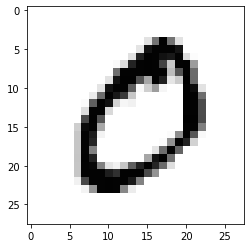

In [7]:
all_values = data_list[1].split(',')
label = int(all_values[0])
print(f"{label = }")

image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

#### scale input to range 0.01 to 1.00

In [8]:
scaled_input = (image_array / 255.0 * 0.99) + 0.01

scaled_input

array([[0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.208     , 0.62729412, 0.99223529, 0.62729412, 0.20411765,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.19635294,
        0.934     , 0.98835294, 0.98835294, 0.98835294, 0.93011765,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.21964706, 0.89129412,
        0.99223529, 0.98835294, 0.93788235, 0.91458824, 0.98835294,
        0.23129412, 0.03329412, 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.04882353, 0.24294118, 0.87964706, 0.98835294,
        0.99223529, 0.98835294, 0.79423529, 0.33611765, 0.98835294,
        0.99223529, 0.48364706, 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.64282353, 0.98835294, 0.98835294, 0.98835294,
        0.99223529, 0.98835294, 0.98835294, 0.38270588, 0.74376471,
        0.99223529, 0.65835294, 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.208     , 0.934     , 0.99223529, 0.99223529, 0.74764706,
        0.45258824, 0.99223529, 0.89517647, 0.19247059, 0.31670588,
        1.        , 0.66223529, 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.19635294,
        0.934 

#### output nodes is 10 (example)

In [9]:
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])